# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [5]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [6]:
#browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)
html_content = response.text  
# html_content = response.text  url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
# browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html_content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.

In [49]:
# Extract all rows of data
#alldata = soup.find_all('table', class_='table')
#alldata
rows = soup.find_all("tr", class_="data-row")
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [51]:
# Create an empty list
mars_data_rows = []

# Loop through the scraped data (assuming `rows` is already defined)
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    mars_data_rows.append(row) 

# Print the list of rows (optional)
mars_data_rows


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
tables = pd.read_html(url)

# Create DataFrame
Mars_DF = tables[0]
# Print the DataFrame
Mars_DF

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Confirm DataFrame was created successfully
Mars_DF


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
Mars_DF.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [14]:
# Change data types for data analysis
Mars_DF['id'] = Mars_DF['id'].astype(object)
Mars_DF['terrestrial_date'] = pd.to_datetime(Mars_DF['terrestrial_date'])

In [15]:
# Confirm type changes were successful by examining data types again
Mars_DF.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [54]:
# 1. How many months are there on Mars?
Mars_DF["month"].value_counts().sort_index()


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [17]:
# 2. How many Martian days' worth of data are there?
Mars_DF['sol'].count()

1867

In [18]:
# 3. What is the average low temperature by month?
Avg_LTM = Mars_DF.groupby(["month"]).mean()["min_temp"]
Avg_LTM

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

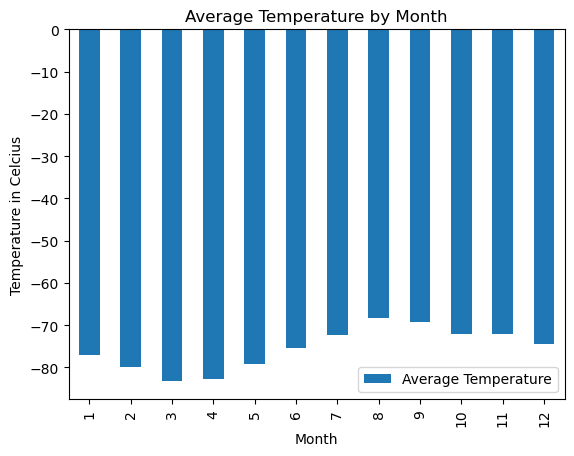

In [47]:
# Plot the average temperature by month
Avg_LTM.plot.bar()
plt.title('Average Temperature by Month')
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")
plt.legend(["Average Temperature"])
plt.savefig("../Average_Temperature_by_Month.png")
plt.show()

In [40]:
monthly_temp = Mars_DF.groupby("month")["min_temp"].mean().reset_index()


print(Monthly_temp)
# Identify the coldest month (month with the lowest mean temperature)
coldest_month = monthly_temp.loc[monthly_temp["min_temp"].idxmin()]

# Identify the hottest month (month with the highest median temperature)
hottest_month = monthly_temp.loc[monthly_temp["min_temp"].idxmax()]

print("Coldest Month:")
print(coldest_month)

print("\nHottest Month:")
print(hottest_month)

month
1    -77.0
2    -80.0
3    -84.0
4    -83.0
5    -79.0
6    -75.0
7    -72.0
8    -68.0
9    -69.0
10   -72.0
11   -72.0
12   -74.0
Name: min_temp, dtype: float64
Coldest Month:
month        3.000000
min_temp   -83.307292
Name: 2, dtype: float64

Hottest Month:
month        8.000000
min_temp   -68.382979
Name: 7, dtype: float64


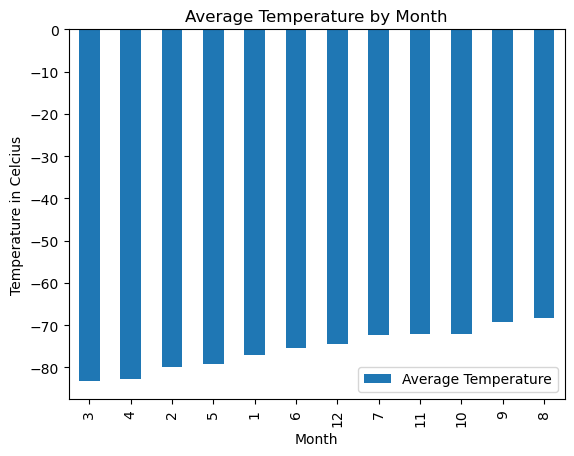

In [55]:
# Sort the average temperatures
Avg_LTM_sorted = Avg_LTM.sort_values()

# Plot the sorted average temperature by month
Avg_LTM_sorted.plot.bar()
plt.title('Average Temperature by Month')
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")
plt.legend(["Average Temperature"])
plt.savefig("../Average_Temperature_by_Month_Sorted.png")
plt.show()

In [42]:
# 4. Average pressure by Martian month
Avg_pressure = Mars_DF.groupby(['month']).mean()['pressure']
Avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

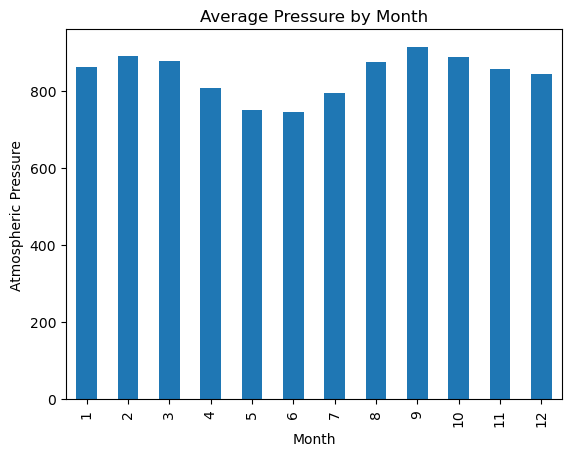

In [52]:
# Plot the average pressure by month

Avg_pressure.plot.bar()
plt.title('Average Pressure by Month')
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.savefig("../Average_Pressure_by_Month.png")
plt.show()

In [44]:
Mars_DF['terrestrial_date']
Mars_DF


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [45]:
elapsed_days = (Mars_DF['terrestrial_date']-Mars_DF['terrestrial_date'].min()).dt.days
elapsed_days

0          0
1          1
2          2
3          3
4          4
        ... 
1862    2017
1863    2018
1864    2019
1865    2020
1866    2021
Name: terrestrial_date, Length: 1867, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


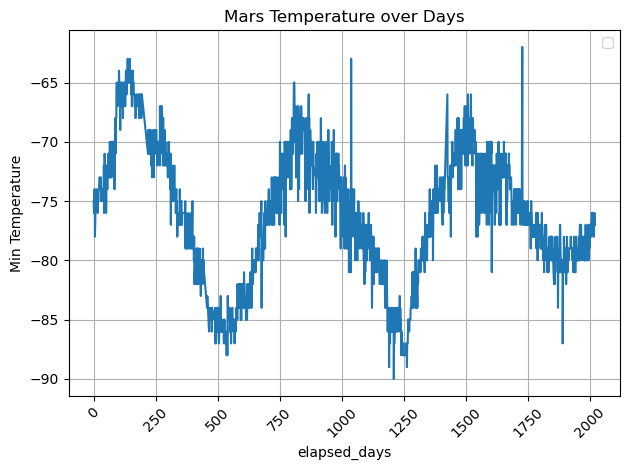

In [46]:
#plt.plot(Mars_DF['terrestrial_date'], Mars_DF['min_temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.plot(elapsed_days, Mars_DF['min_temp'])
# Adding labels and title
plt.xlabel('elapsed_days')
plt.ylabel('Min Temperature')
plt.title('Mars Temperature over Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("../Mars Temperature over Days.png")
# Display the plot
plt.tight_layout()
plt.show()

#### From this plot, we can estimate that a martian year is approximately 750 earth days.

##### Now, we will investigate the martian month

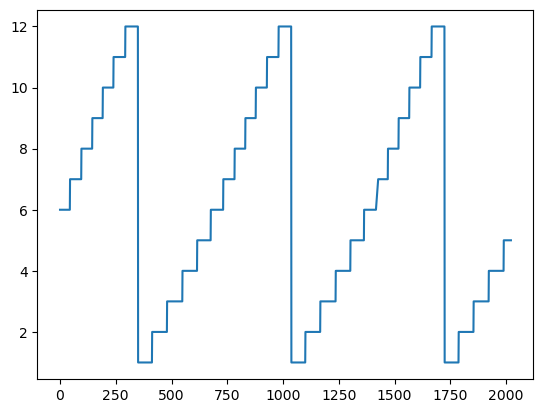

In [107]:
plt.plot(elapsed_days, Mars_DF['month'])

## We can see the months vary between 1 and 12.  

### We will make a series index by terrestrial_date

In [133]:
Mars_date_DF = Mars_DF.set_index('terrestrial_date')
mars_month_series = Mars_date_DF['month']
mars_month_series

terrestrial_date
2012-08-16    6
2012-08-17    6
2012-08-18    6
2012-08-19    6
2012-08-20    6
             ..
2018-02-23    5
2018-02-24    5
2018-02-25    5
2018-02-26    5
2018-02-27    5
Name: month, Length: 1867, dtype: int64

### A martian new year is when the martian month drop from 12 to 1

In [137]:
mars_month_diff_series = mars_month_series.diff()
mars_month_diff_series.head()

terrestrial_date
2012-08-16    NaN
2012-08-17    0.0
2012-08-18    0.0
2012-08-19    0.0
2012-08-20    0.0
Name: month, dtype: float64

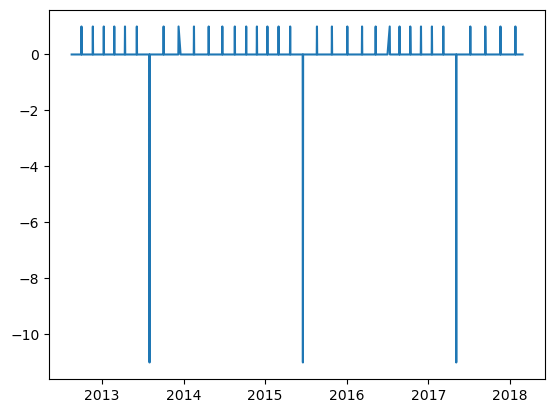

In [138]:
plt.plot(mars_month_diff_series)

In [141]:
mars_newyear_mask_series = mars_month_diff_series < 0
mars_newyear_mask_series.head()

terrestrial_date
2012-08-16    False
2012-08-17    False
2012-08-18    False
2012-08-19    False
2012-08-20    False
Name: month, dtype: bool

In [143]:
mars_newyear_series = mars_month_diff_series[mars_newyear_mask_series]
mars_newyear_series

terrestrial_date
2013-08-01   -11.0
2015-06-19   -11.0
2017-05-06   -11.0
Name: month, dtype: float64

In [145]:
mars_newyear_dates = mars_newyear_series.index
mars_newyear_dates 

DatetimeIndex(['2013-08-01', '2015-06-19', '2017-05-06'], dtype='datetime64[ns]', name='terrestrial_date', freq=None)

In [153]:
earthdays_per_martian_year = (mars_newyear_dates[1] - mars_newyear_dates[0]).days
earthdays_per_martian_year

687

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [37]:
# Write the data to a CSV
#csv_file = 'Mars_DF.csv'

# Writing DataFrame to CSV file
Mars_DF.to_csv("../Mars_date.csv", index_label="id")

In [21]:
browser.quit()